<a href="https://colab.research.google.com/github/BayramovaNazrin/test1/blob/main/dataset_summary_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [43]:
!git clone https://github.com/BayramovaNazrin/test1.git
%cd /content/test1


fatal: destination path 'test1' already exists and is not an empty directory.
/content/test1


In [44]:
#for updates, do not forget delete them
!git pull
import importlib, load_data
importlib.reload(load_data)


Already up to date.


<module 'load_data' from '/content/test1/load_data.py'>

In [45]:
import sys
sys.path.append('/content/test1')

from load_data import load_data
features, edges, classes, merged_df = load_data()


# **Dataset Overview**

In [46]:
# 1. Basic counts
num_nodes = features.shape[0]
num_edges = edges.shape[0]
num_transactions = merged_df.shape[0]

# 2. Label distribution (licit / illicit / unlabeled)
licit = merged_df['class'].eq(2).sum()
illicit = (merged_df['class'] == 1).sum()
unlabeled = merged_df['class'].eq(3).sum()
nan_count = merged_df['class'].isna().sum()
num_nodes = merged_df.shape[0]
num_edges = edges.shape[0]
total_labeled = licit + illicit + unlabeled + nan_count

# 3. Percentages
licit_pct = licit / num_nodes * 100
illicit_pct = illicit / num_nodes * 100
unlabeled_pct = unlabeled / num_nodes * 100

# 4. Display summary
print(f"Nodes: {num_nodes:,}")
print(f"Edges: {num_edges:,}")
print(f"Transactions: {num_transactions:,}")
print(f"Labeled: Licit (class=1): {licit:,} ({licit_pct:.1f}%)")
print(f"Labeled: Illicit (class=2): {illicit:,} ({illicit_pct:.1f}%)")
print(f"Unlabeled: {unlabeled:,} ({unlabeled_pct:.1f}%)")

#Checking for null values
missing = merged_df.isna().sum()
missing = missing[missing > 0]
print("Columns with missing values:\n", missing if not missing.empty else "None found ✅")



Nodes: 203,769
Edges: 234,355
Transactions: 203,769
Labeled: Licit (class=1): 42,019 (20.6%)
Labeled: Illicit (class=2): 4,545 (2.2%)
Unlabeled: 157,205 (77.1%)
Columns with missing values:
 None found ✅


*Licit is 2, illicit is 1 and unknown is 3*

## Check for Missing Values

In [47]:
print("Missing values in features:", features.isna().sum())
print("Missing values in edges:", edges.isna().sum())
print("Missing values in classes:", classes.isna().sum())

Missing values in features: txId           0
time_step      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_161    0
feature_162    0
feature_163    0
feature_164    0
feature_165    0
Length: 167, dtype: int64
Missing values in edges: txId1    0
txId2    0
dtype: int64
Missing values in classes: txId     0
class    0
dtype: int64


# **Descriptive Statistics**

## Describe

In [48]:
print(features.describe().T, '\n', '------------------------------------------------------')
print(edges.describe().T, '\n', '------------------------------------------------------')
print(classes.describe().T,  '\n', '------------------------------------------------------')

                count          mean        std       min       25%        50%  \
time_step    203769.0  2.384396e+01  15.172170  1.000000  9.000000  23.000000   
feature_1    203769.0  2.454849e-17   1.000002 -0.172983 -0.172532  -0.169204   
feature_2    203769.0 -7.531922e-18   1.000002 -0.210553 -0.180327  -0.132897   
feature_3    203769.0  2.231681e-17   1.000002 -1.756361 -1.201369   0.463609   
feature_4    203769.0  6.241732e-17   1.000002 -0.121970 -0.121970  -0.121970   
...               ...           ...        ...       ...       ...        ...   
feature_161  203769.0  2.231681e-18   1.000002 -0.125939 -0.087490  -0.087490   
feature_162  203769.0  5.244450e-17   1.000002 -0.131155 -0.131155  -0.131155   
feature_163  203769.0  1.562177e-17   1.000002 -0.269818 -0.140597  -0.097524   
feature_164  203769.0  4.072817e-17   1.000002 -1.760926 -0.120613  -0.120613   
feature_165  203769.0  5.913954e-17   1.000002 -1.760984 -0.119792  -0.119792   

                   75%     

## Check for Data Types

In [49]:
print('These are data types of features table;', '\n',features.dtypes, '\n', '-----------------------------------------' )
print('These are data types of edges table;','\n',edges.dtypes, '\n', '-----------------------------------------------' )
print('These are data types of classes table;','\n', classes.dtypes,'\n', '---------------------------------------------' )

These are data types of features table; 
 txId            object
time_step        int64
feature_1      float64
feature_2      float64
feature_3      float64
                ...   
feature_161    float64
feature_162    float64
feature_163    float64
feature_164    float64
feature_165    float64
Length: 167, dtype: object 
 -----------------------------------------
These are data types of edges table; 
 txId1    int64
txId2    int64
dtype: object 
 -----------------------------------------------
These are data types of classes table; 
 txId     object
class    object
dtype: object 
 ---------------------------------------------


## Check for Missing Values

In [51]:
print("Missing values in features:", features.isna().sum())
print("Missing values in edges:", edges.isna().sum())
print("Missing values in classes:", classes.isna().sum())

Missing values in features: txId           0
time_step      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_161    0
feature_162    0
feature_163    0
feature_164    0
feature_165    0
Length: 167, dtype: int64
Missing values in edges: txId1    0
txId2    0
dtype: int64
Missing values in classes: txId     0
class    0
dtype: int64


# *Store all images*

In [52]:
import os

save_dir = "/content/test1/visuals"
os.makedirs(save_dir, exist_ok=True)

# **Feature Distributions**

In [57]:
import matplotlib.pyplot as plt

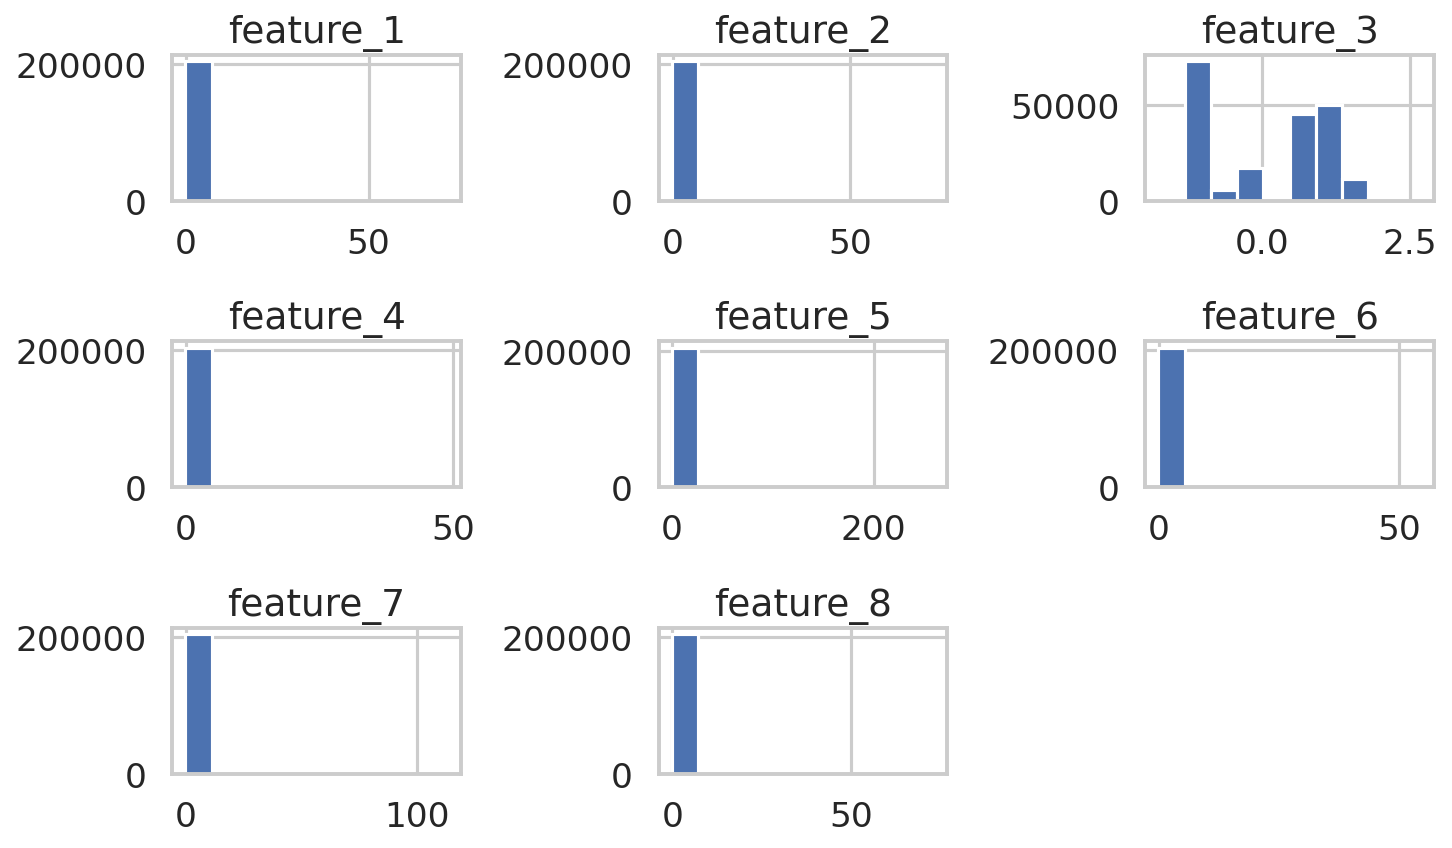

In [66]:
features.iloc[:, 2:10].hist(figsize=(10, 6))
plt.tight_layout()
plt.savefig(f"{save_dir}/feature_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

In [35]:
plt.savefig("/content/test1/visuals/my_plot.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

# **Correlation Analysis**

In [30]:
import seaborn as sns

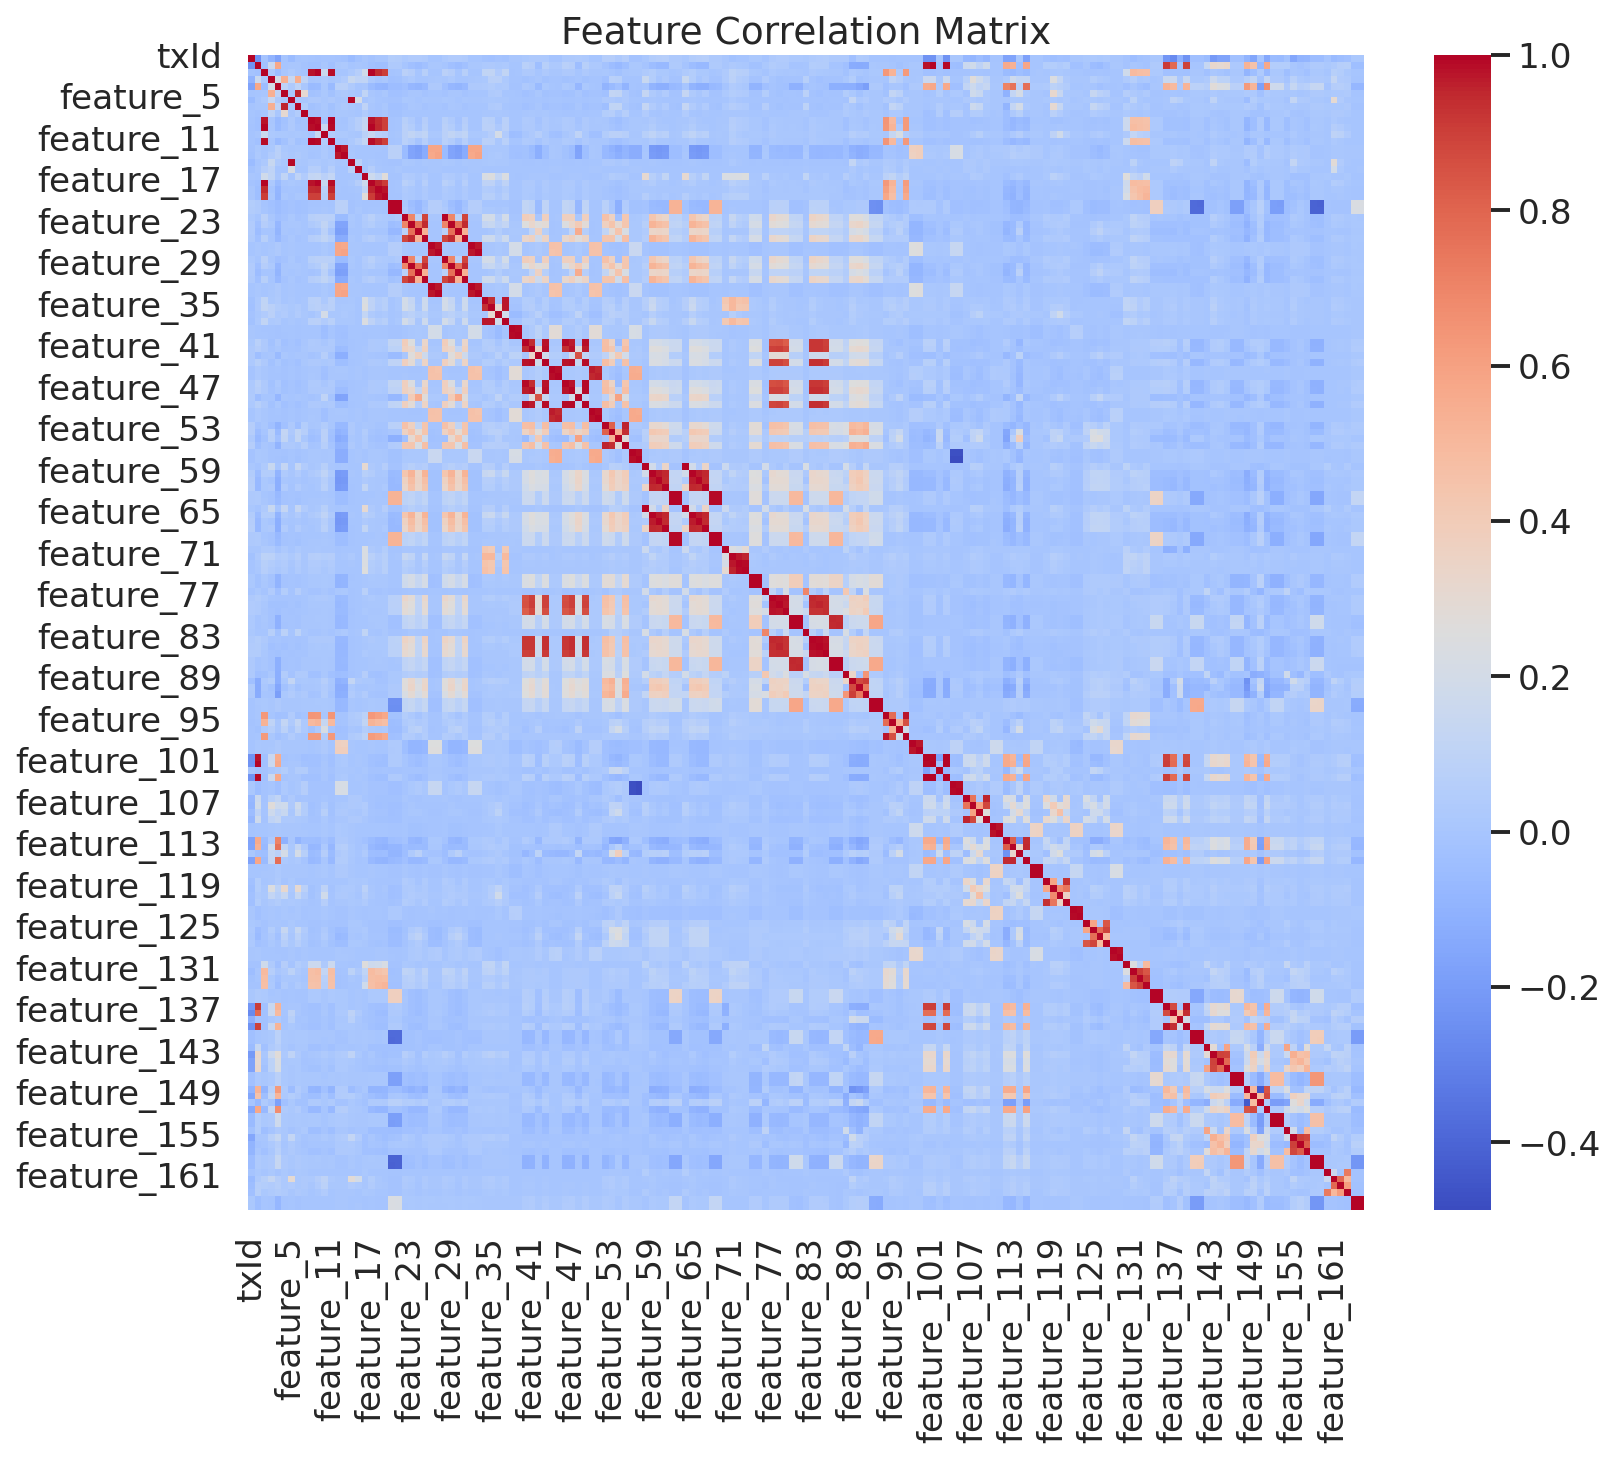

In [65]:
correlation_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.savefig(f"{save_dir}/feature_correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# **Temporal Class Evolution**

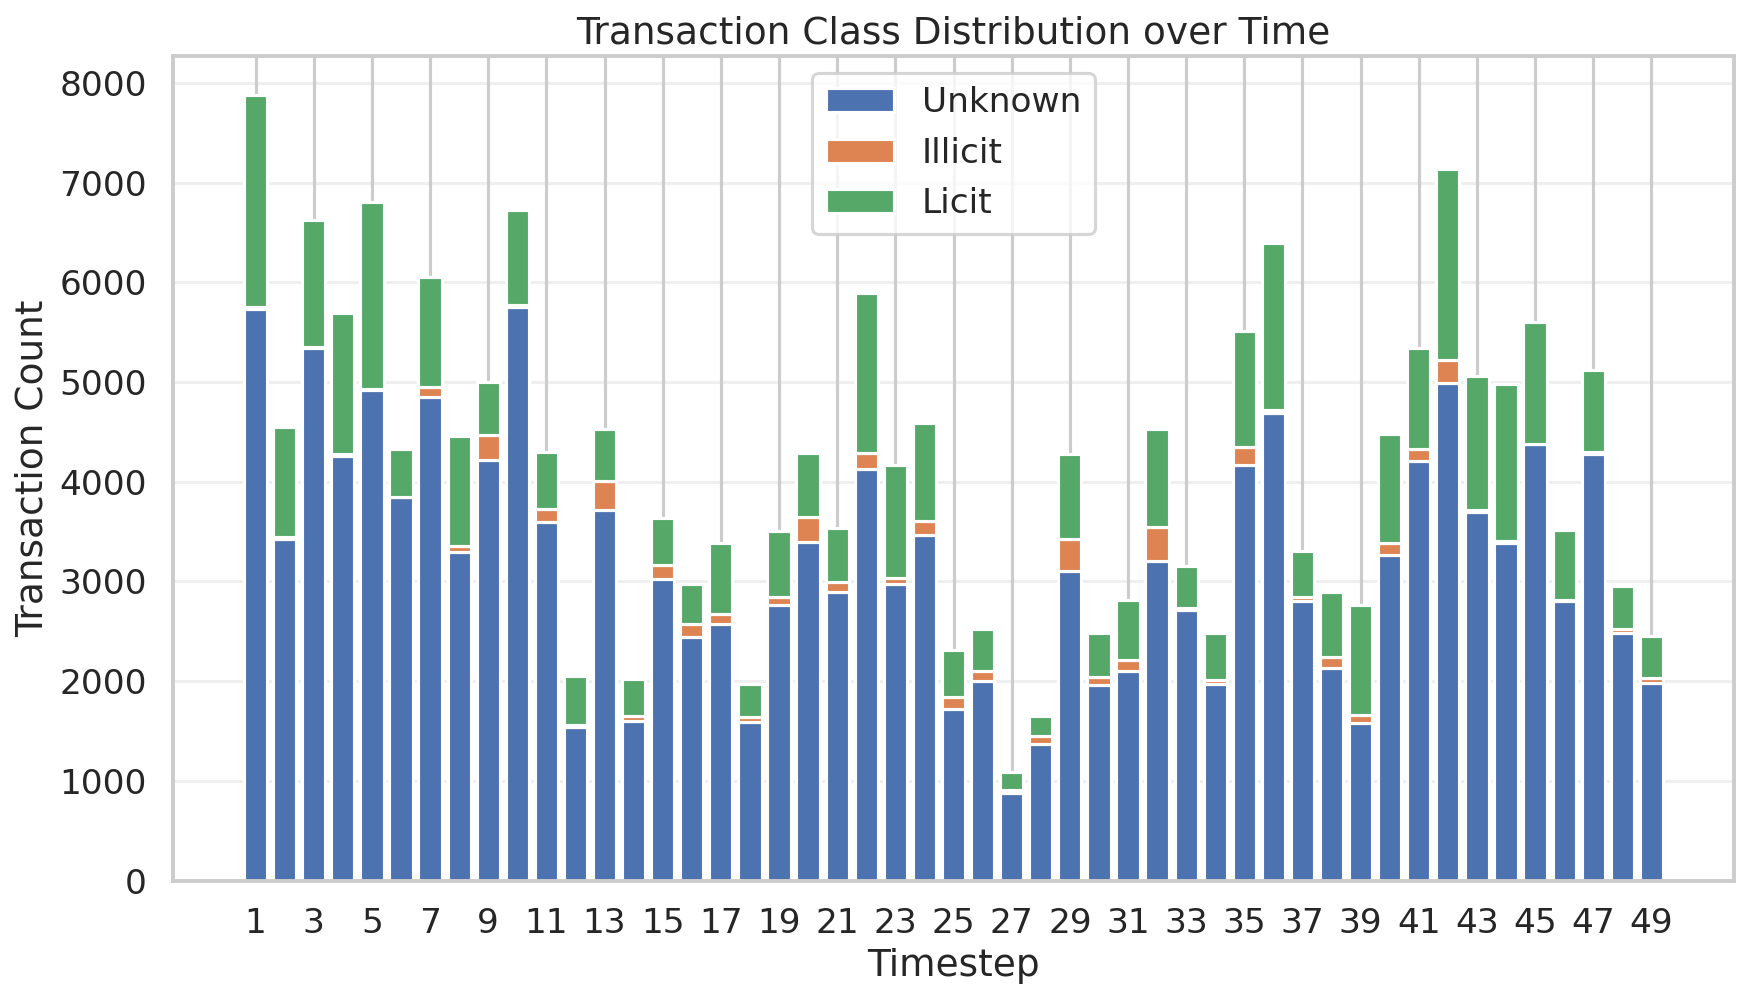

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

time_class_df = merged_df[['time_step', 'class']]

UNKNOWN_CLASS = 3
LICIT_CLASS = 2
ILLEGAL_CLASS = 1

# Transactions by class type
unknown_transactions = time_class_df[time_class_df['class'] == UNKNOWN_CLASS]
licit_transactions = time_class_df[time_class_df['class'] == LICIT_CLASS]
illicit_transactions = time_class_df[time_class_df['class'] == ILLEGAL_CLASS]

# Counts of transactions per timestep for each class
# All timesteps (1-49) are represented, filling missing with 0
timesteps = range(1, 50)
unknown_counts = unknown_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()
licit_counts = licit_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()
illicit_counts = illicit_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()

# The stacked bar chart
plt.figure(figsize=(12, 7))
plt.bar(timesteps, unknown_counts, label="Unknown", alpha=1)
plt.bar(timesteps, illicit_counts, bottom=unknown_counts, label="Illicit", alpha=1)
plt.bar(timesteps, licit_counts, bottom=unknown_counts + illicit_counts, label="Licit", alpha=1)

# Formatting
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Transaction Count")
plt.title("Transaction Class Distribution over Time")
plt.xticks(np.arange(1, 50, 2))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{save_dir}/time_count.png", dpi=300, bbox_inches="tight")
plt.show()

# **Illicit Transactions Trend**

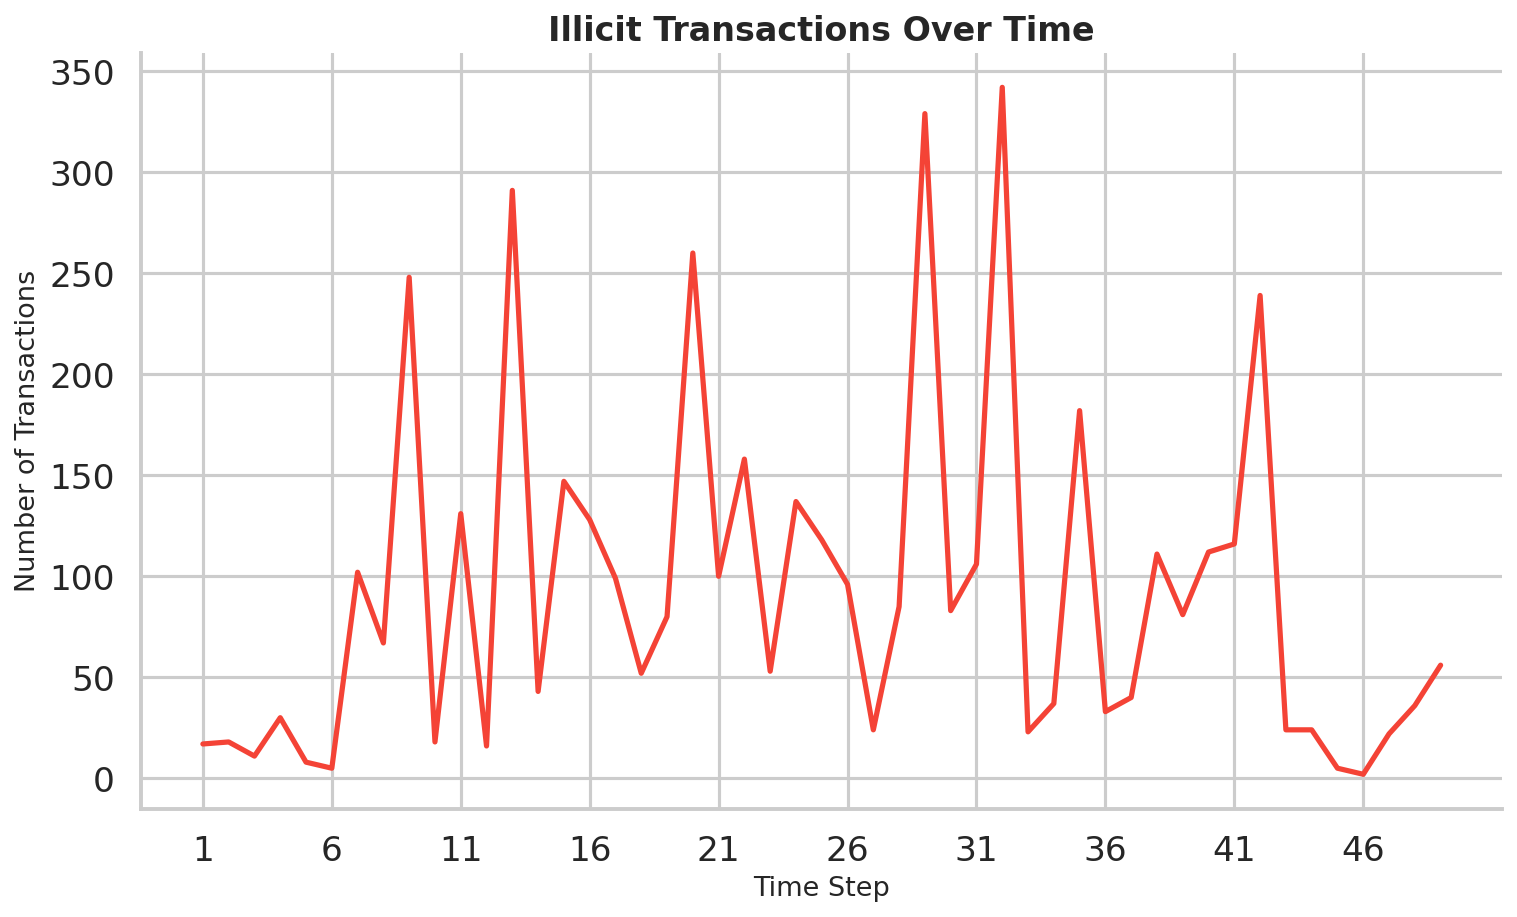

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuration
sns.set_theme(style="whitegrid", context="talk")

# Filter for illicit transactions
df_illicit = merged_df[merged_df['class'] == 1]

# Count transactions per timestep
counts = (
    df_illicit['time_step']
    .value_counts()
    .reset_index(name='count')
    .rename(columns={'index': 'time_step'})
    .sort_values('time_step')
)

# Plot
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

sns.lineplot(
    data=counts,
    x='time_step',
    y='count',
    ax=ax,
    color="#f44336",
    linewidth=2.5,
)

sns.despine(fig=fig, ax=ax)
ax.set_title("Illicit Transactions Over Time", fontsize=16, weight='bold')
ax.set_xlabel("Time Step", fontsize=13)
ax.set_ylabel("Number of Transactions", fontsize=13)

plt.xticks(np.arange(1, 50, 5))
plt.savefig(f"{save_dir}/illicit_transactions_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


# **Class Distribution Overview**

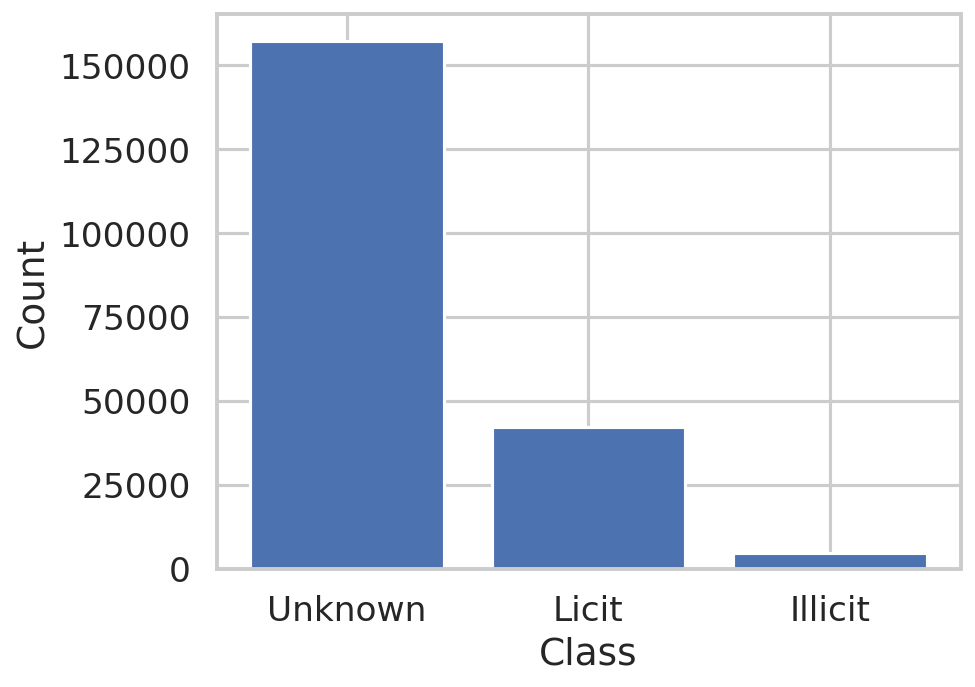

In [70]:
classes = merged_df['class'].value_counts()
plt.bar(['Unknown', 'Licit', 'Illicit'],classes)
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig(f"{save_dir}/classes.png", dpi=300, bbox_inches="tight")

# Uploads images to GitHub

In [71]:
%cd /content/test1
!git add visuals/
!git commit -m "Add new EDA plots"
!git push origin main


/content/test1
[main 3ec74af] Add new EDA plots
 5 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 visuals/classes.png
 create mode 100644 visuals/feature_correlation_matrix.png
 create mode 100644 visuals/feature_distributions.png
 create mode 100644 visuals/illicit_transactions_over_time.png
 rewrite visuals/time_count.png (98%)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 2 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 910.14 KiB | 10.46 MiB/s, done.
Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/BayramovaNazrin/test1.git
   70453a4..3ec74af  main -> main
